In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## Cleaning

In [2]:
filePath = 'C:/Users/asus/CS649_SkyObjectProject/data/Skyserver_SQL4_7_2022 12_58_52 AM.csv'
#filePath = 'C:/Users/asus/CS649_SkyObjectProject/data/sample.csv'

In [3]:
def readCSV(filePath, isSample = False):
    if not isSample:
        skyObj = pd.read_csv(filePath,skiprows=1, index_col='objid')
    else:
        skyObj = pd.read_csv(filePath, index_col='objid')
     
    skyObj = skyObj.sort_index()
    return skyObj

In [4]:
skyObj = readCSV(filePath, isSample=True)
skyObj = skyObj.sort_index()

In [5]:
skyObj.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1237645943978459165,55.320066,0.883422,17.27455,16.14819,15.72749,15.57004,15.50722,109,301,6,...,347.31560,511.6885,591.5410,626.7759,1709231556582729728,STAR,0.000052,1518,52937,420
1237645943978524759,55.523500,0.938595,19.15007,17.08453,16.27119,15.97778,15.82429,109,301,6,...,146.61800,310.1151,406.3389,468.0396,8254202951331237888,STAR,0.000209,7331,56658,839
1237645943978655993,55.831996,0.890834,19.45624,17.64630,16.66085,16.17872,15.78058,109,301,6,...,87.39352,216.6000,337.6862,487.2672,468520901554497536,GALAXY,0.100421,416,51811,533
1237646380469584749,96.137078,-0.387238,16.69150,15.50373,15.23782,15.17920,15.10420,211,301,3,...,628.79250,803.2870,847.8500,908.4896,1417519027005188096,STAR,0.000142,1259,52931,40
1237646381543391669,96.234898,0.423976,17.25586,15.61591,15.23917,15.08549,14.96183,211,301,5,...,567.07140,802.2931,924.2820,1035.7770,1417676257167960064,STAR,-0.000007,1259,52931,612


In [6]:
skyObj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1237645943978459165 to 1237666301631791138
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ra           10000 non-null  float64
 1   dec          10000 non-null  float64
 2   u            10000 non-null  float64
 3   g            10000 non-null  float64
 4   r            10000 non-null  float64
 5   i            10000 non-null  float64
 6   z            10000 non-null  float64
 7   run          10000 non-null  int64  
 8   rerun        10000 non-null  int64  
 9   camcol       10000 non-null  int64  
 10  field        10000 non-null  int64  
 11  modelFlux_u  10000 non-null  float64
 12  modelFlux_g  10000 non-null  float64
 13  modelFlux_r  10000 non-null  float64
 14  modelFlux_i  10000 non-null  float64
 15  modelFlux_z  10000 non-null  float64
 16  specobjid    10000 non-null  uint64 
 17  class        10000 non-null  object 
 18  redshift     1

In [7]:
skyObj.isna().any()

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
run            False
rerun          False
camcol         False
field          False
modelFlux_u    False
modelFlux_g    False
modelFlux_r    False
modelFlux_i    False
modelFlux_z    False
specobjid      False
class          False
redshift       False
plate          False
mjd            False
fiberid        False
dtype: bool

In [8]:
skyObjData = skyObj[['ra','dec','u','g','r','i','z','run', 'rerun', 'camcol', 'field','modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z','redshift','plate','mjd','class']]

In [9]:
skyObjData

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd,class
objid,,,,,,,,,,,,,,,,,,,,
1237645943978459165,55.320066,0.883422,17.27455,16.14819,15.72749,15.57004,15.50722,109,301,6,138,123.07730,347.31560,511.6885,591.5410,626.7759,0.000052,1518,52937,STAR
1237645943978524759,55.523500,0.938595,19.15007,17.08453,16.27119,15.97778,15.82429,109,301,6,139,21.87522,146.61800,310.1151,406.3389,468.0396,0.000209,7331,56658,STAR
1237645943978655993,55.831996,0.890834,19.45624,17.64630,16.66085,16.17872,15.78058,109,301,6,141,16.49961,87.39352,216.6000,337.6862,487.2672,0.100421,416,51811,GALAXY
1237646380469584749,96.137078,-0.387238,16.69150,15.50373,15.23782,15.17920,15.10420,211,301,3,368,210.57210,628.79250,803.2870,847.8500,908.4896,0.000142,1259,52931,STAR
1237646381543391669,96.234898,0.423976,17.25586,15.61591,15.23917,15.08549,14.96183,211,301,5,369,125.21430,567.07140,802.2931,924.2820,1035.7770,-0.000007,1259,52931,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237666275808444496,11.085485,25.441635,18.36913,17.39348,17.04842,16.91469,16.86413,4843,301,5,11,44.90987,110.30860,151.5770,171.4443,179.6140,-0.000954,7672,57339,STAR
1237666299483258911,53.474463,-0.967128,17.69554,16.35920,15.60553,15.35184,15.20496,4849,301,1,812,83.51868,285.96980,572.5179,723.2063,827.9690,0.000012,2049,53350,STAR
1237666299483389991,53.855094,-0.887565,19.27770,17.88260,17.30528,17.06372,16.93094,4849,301,1,814,19.44893,70.30051,119.6433,149.4557,168.8938,0.000121,2049,53350,STAR


In [10]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,184.520630,27.304290,18.637585,17.417673,16.893056,16.632898,16.478172,3158.618100,301.0,3.480900,190.728000,53.128629,200.657794,376.987641,496.752081,549.394511,0.177930,2199.229800,53606.754100
std,69.515052,21.113901,0.820673,0.985193,1.135541,1.200135,1.281944,1093.539186,0.0,1.598715,140.988048,113.698823,1122.500539,2698.420585,3488.083875,2494.744516,0.446988,2018.340037,1460.035439
min,0.066076,-11.182179,12.889300,10.311690,9.390263,9.114689,9.369033,109.000000,301.0,1.000000,11.000000,14.454560,12.016640,-0.001625,5.452661,-31.581620,-0.004020,266.000000,51608.000000
25%,146.125914,7.408262,18.207805,16.871875,16.202492,15.889695,15.634812,2304.000000,301.0,2.000000,85.000000,19.684372,59.284260,92.469763,115.601600,128.161200,0.000040,956.000000,52559.000000
50%,186.054690,30.004613,18.866265,17.528975,16.916430,16.629720,16.458415,3530.000000,301.0,3.000000,156.000000,28.410840,97.366665,171.170350,222.901800,260.993100,0.050775,1677.000000,53179.000000
75%,225.259783,44.488220,19.264640,18.067647,17.584998,17.342585,17.230573,3958.000000,301.0,5.000000,255.000000,52.104388,178.340825,330.371225,440.679575,557.282225,0.099083,2460.000000,54480.000000
max,359.973062,79.356697,19.599890,19.800480,24.809400,20.657300,26.903020,4849.000000,301.0,6.000000,828.000000,6986.831000,75045.460000,175345.600000,226008.200000,178808.000000,6.398253,11703.000000,58526.000000


In [11]:
# Drop dublicated features
skyObjData.drop_duplicates(inplace=True)

D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Visualization

In [12]:
skyObjData['class'].value_counts()

GALAXY    5430
STAR      3482
QSO       1088
Name: class, dtype: int64

In [13]:
targetCount = skyObjData['class'].value_counts()

In [14]:
print(f'Class 0: {targetCount[0]}')
print(f'Class 1: {targetCount[1]}')
print(f'Class 2: {targetCount[2]}')
print(f'Percentage of Majority Class: {round(targetCount[0] / sum(targetCount), 4)*100}')
print(f'Percentage of Minority Class: {round(targetCount[2] / sum(targetCount), 4)*100}')

Class 0: 5430
Class 1: 3482
Class 2: 1088
Percentage of Majority Class: 54.300000000000004
Percentage of Minority Class: 10.879999999999999


<AxesSubplot:xlabel='class', ylabel='count'>

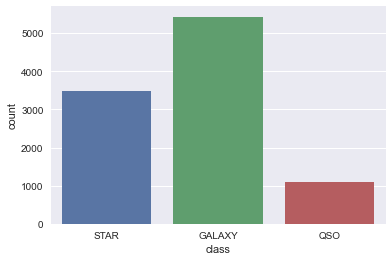

In [15]:
sns.countplot(x=skyObjData['class'],label="Count")

In [16]:
skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)

C:\Users\asus\AppData\Local\Temp/ipykernel_19900/3508656233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)


In [17]:
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class       
GALAXY False               3
       True             5427
QSO    True             1088
STAR   False            2247
       True             1235

<AxesSubplot:xlabel='class,redshift_class'>

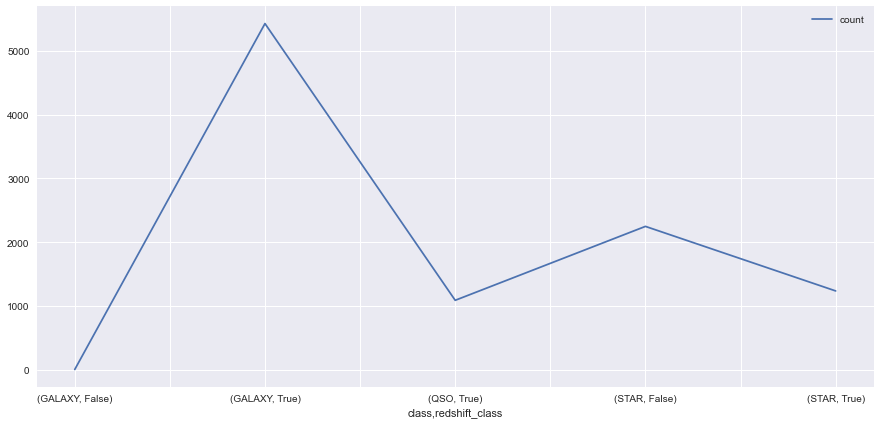

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

<AxesSubplot:xlabel='ra', ylabel='dec'>

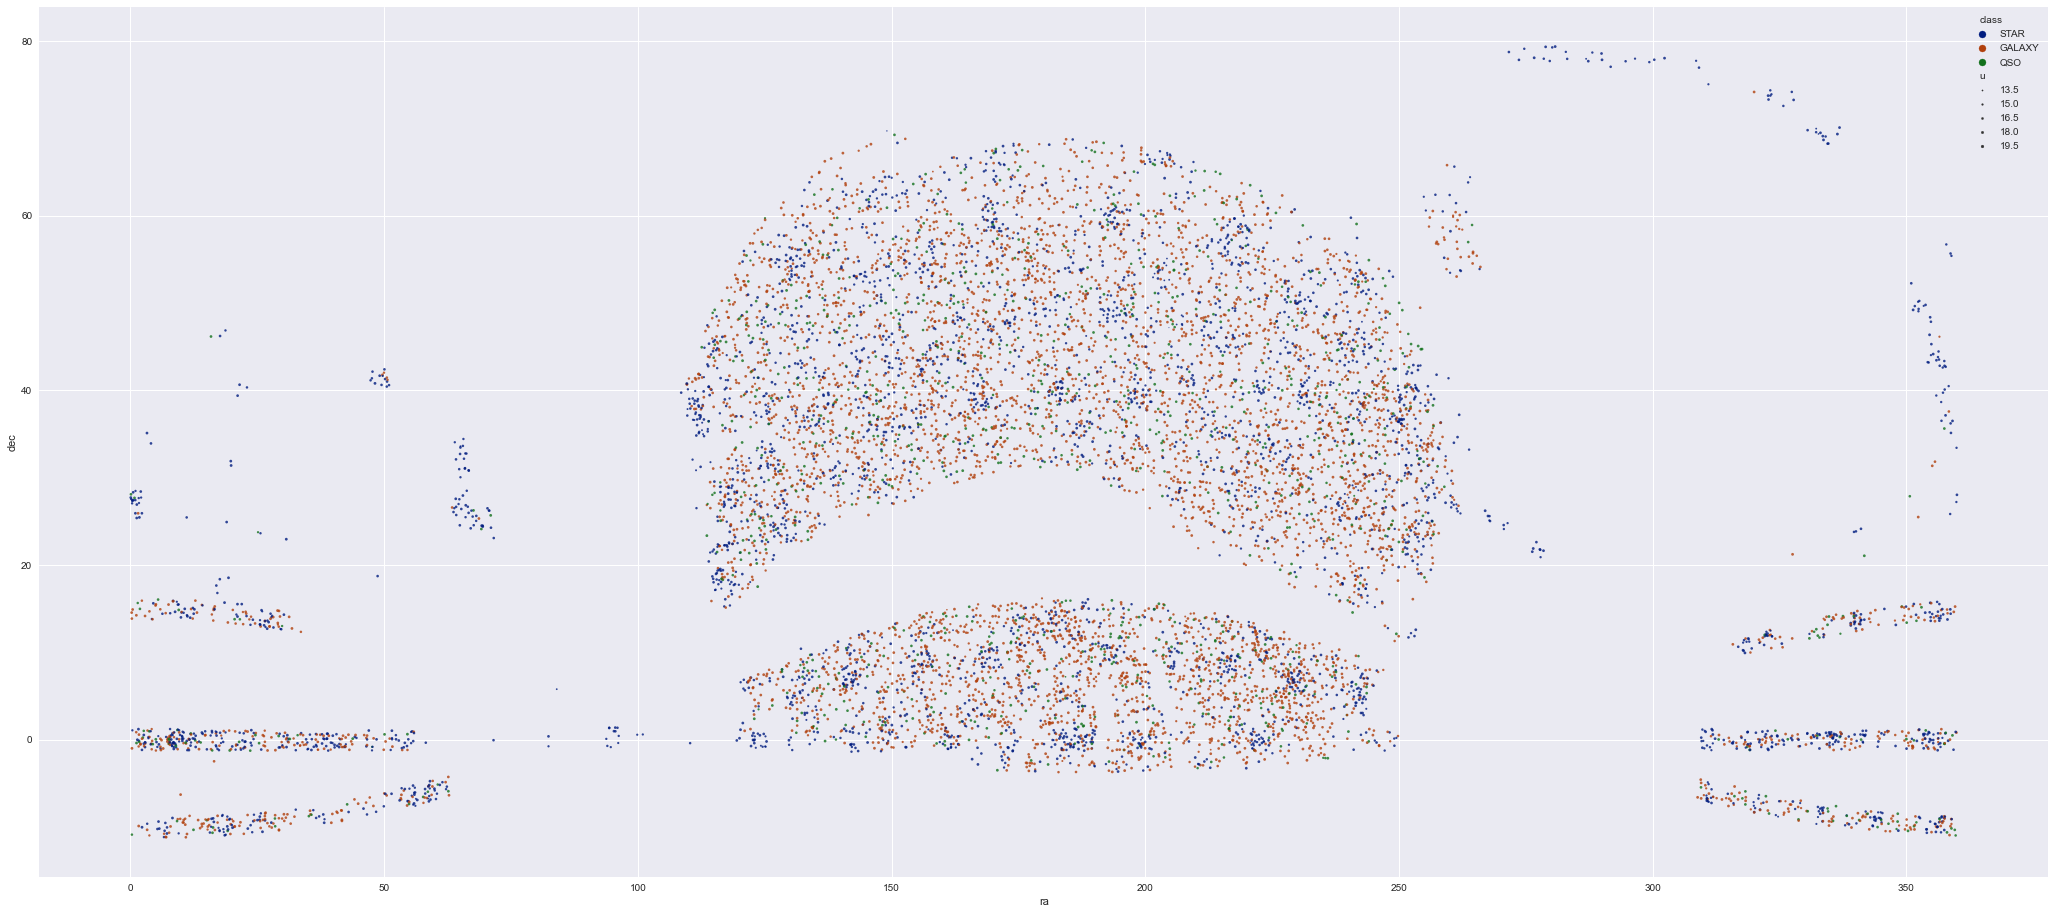

In [19]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=skyObjData)

In [20]:
sampleData = skyObjData.sample(int(len(skyObjData)*0.001))

<Figure size 1080x504 with 0 Axes>

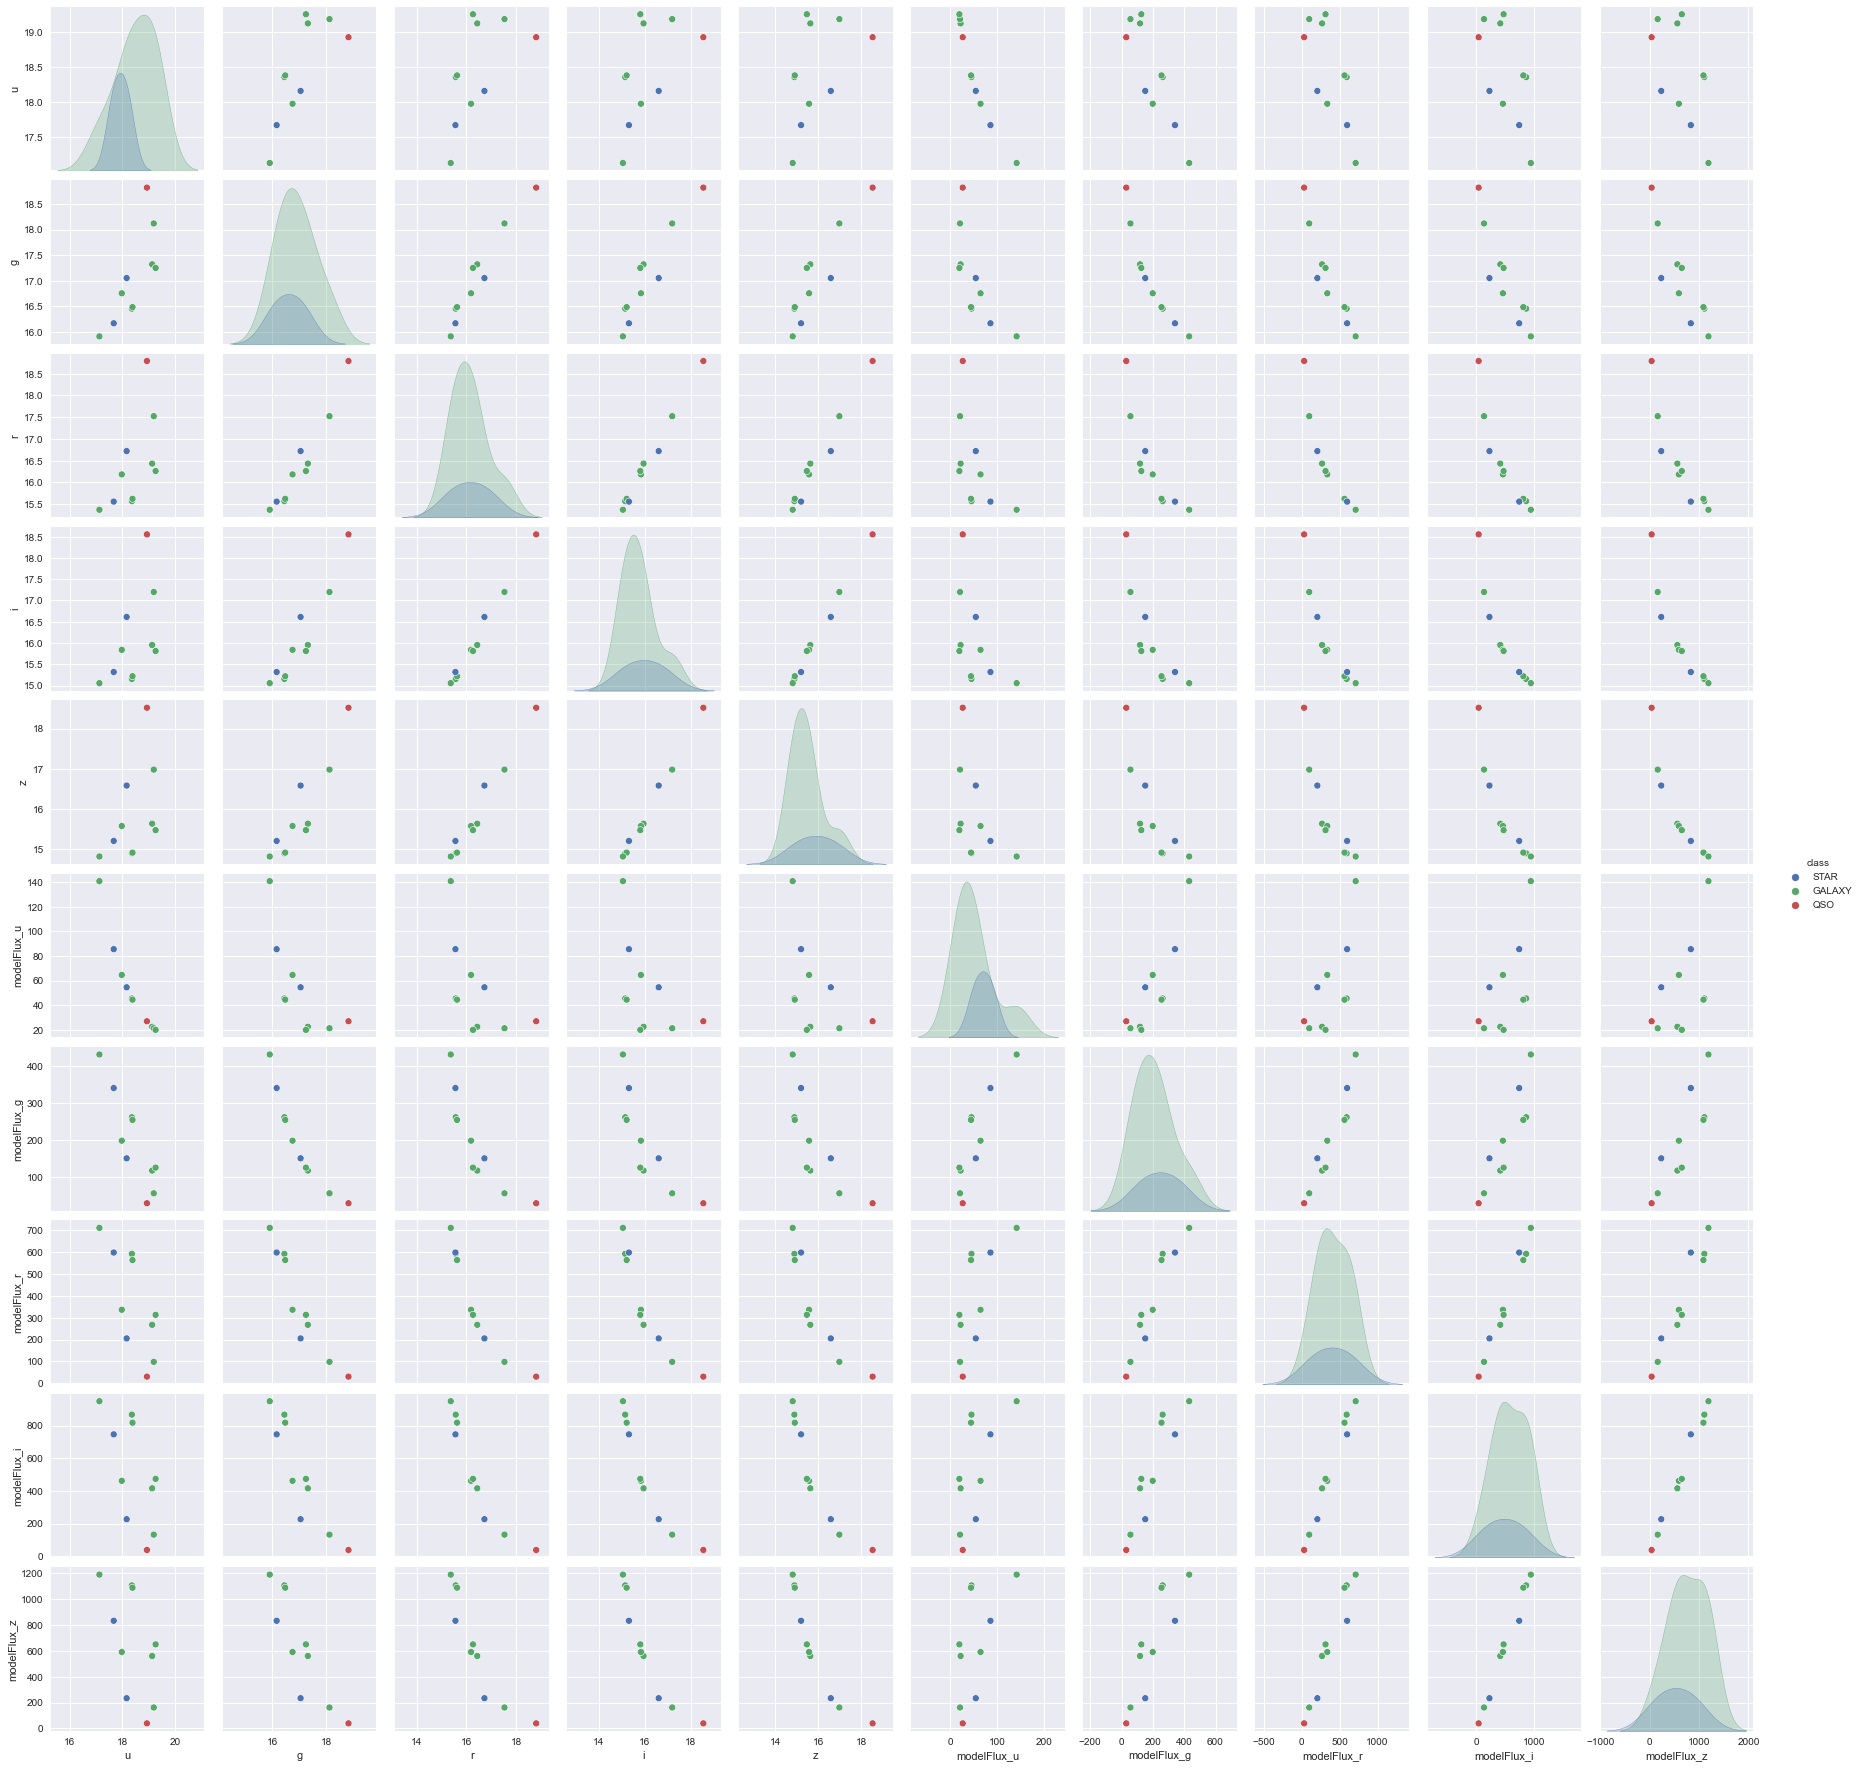

In [21]:
plt.figure(figsize = (15,7))
sns.pairplot(sampleData[['class', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z']], hue='class')

<Figure size 1080x504 with 0 Axes>

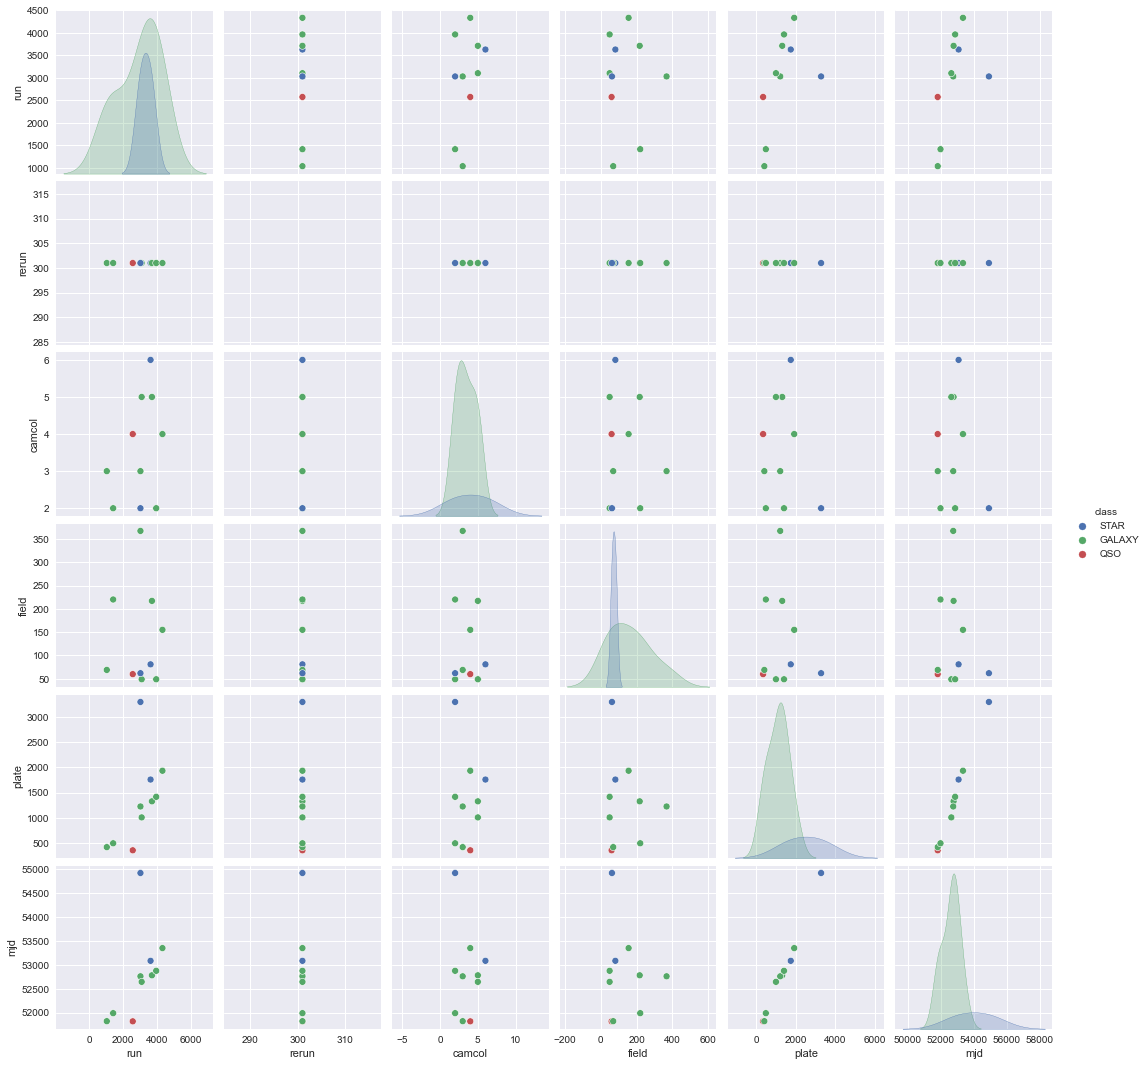

In [22]:
plt.figure(figsize = (15,7))
sns.pairplot(sampleData[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

## Feature Engineering

In [23]:
# Colour Indexes-difference between the two spectrum range
skyObjData['color_u_g'] = skyObjData['u'] - skyObjData['g']
skyObjData['color_g_r'] = skyObjData['g'] - skyObjData['r']
skyObjData['color_r_i'] = skyObjData['r'] - skyObjData['i']
skyObjData['color_i_z'] = skyObjData['i'] - skyObjData['z']

In [24]:
skyObjData[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

,u,g,r,i,z,color_u_g,color_g_r,color_r_i,color_i_z
objid,,,,,,,,,
1237645943978459165,17.27455,16.14819,15.72749,15.57004,15.50722,1.12636,0.42070,0.15745,0.06282
1237645943978524759,19.15007,17.08453,16.27119,15.97778,15.82429,2.06554,0.81334,0.29341,0.15349
1237645943978655993,19.45624,17.64630,16.66085,16.17872,15.78058,1.80994,0.98545,0.48213,0.39814
1237646380469584749,16.69150,15.50373,15.23782,15.17920,15.10420,1.18777,0.26591,0.05862,0.07500
1237646381543391669,17.25586,15.61591,15.23917,15.08549,14.96183,1.63995,0.37674,0.15368,0.12366


In [25]:
# conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = skyObjData.iloc[:, 11:16]
for i in cols:
    skyObjData[i] = skyObjData[i] * 3.631*(10**-6)

skyObjData.iloc[:, 11:16].describe()

,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,0.000193,0.000729,1.368842e-03,0.001804,0.001995
std,0.000413,0.004076,9.797965e-03,0.012665,0.009058
min,0.000052,0.000044,-5.899972e-09,0.000020,-0.000115
25%,0.000071,0.000215,3.357577e-04,0.000420,0.000465
50%,0.000103,0.000354,6.215195e-04,0.000809,0.000948
75%,0.000189,0.000648,1.199578e-03,0.001600,0.002023
max,0.025369,0.272490,6.366799e-01,0.820636,0.649252


In [26]:
# log transformation to decrease the effect of the outliers

skyObjData['logRedshift'] = (skyObjData['redshift']+1).transform(np.log)

In [27]:
# Encode target

objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
skyObjData['class'] = skyObjData['class'].map(objects)

In [28]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_z,redshift,plate,mjd,class,color_u_g,color_g_r,color_r_i,color_i_z,logRedshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,184.520630,27.304290,18.637585,17.417673,16.893056,16.632898,16.478172,3158.618100,301.0,3.480900,...,0.001995,0.177930,2199.229800,53606.754100,0.76060,1.219912,0.524617,0.260158,0.154726,0.122629
std,69.515052,21.113901,0.820673,0.985193,1.135541,1.200135,1.281944,1093.539186,0.0,1.598715,...,0.009058,0.446988,2018.340037,1460.035439,0.63224,0.530158,0.330051,0.229829,0.248448,0.250975
min,0.066076,-11.182179,12.889300,10.311690,9.390263,9.114689,9.369033,109.000000,301.0,1.000000,...,-0.000115,-0.004020,266.000000,51608.000000,0.00000,-1.258780,-6.385300,-4.322030,-9.563260,-0.004028
25%,146.125914,7.408262,18.207805,16.871875,16.202492,15.889695,15.634812,2304.000000,301.0,2.000000,...,0.000465,0.000040,956.000000,52559.000000,0.00000,0.968012,0.322937,0.144780,0.049735,0.000040
50%,186.054690,30.004613,18.866265,17.528975,16.916430,16.629720,16.458415,3530.000000,301.0,3.000000,...,0.000948,0.050775,1677.000000,53179.000000,1.00000,1.228370,0.533450,0.282990,0.156290,0.049528
75%,225.259783,44.488220,19.264640,18.067647,17.584998,17.342585,17.230573,3958.000000,301.0,5.000000,...,0.002023,0.099083,2460.000000,54480.000000,1.00000,1.560885,0.761685,0.397480,0.282728,0.094476
max,359.973062,79.356697,19.599890,19.800480,24.809400,20.657300,26.903020,4849.000000,301.0,6.000000,...,0.649252,6.398253,11703.000000,58526.000000,2.00000,5.685420,3.132710,7.078540,4.533400,2.001244


In [29]:
# Reorder columns

skyObjData=skyObjData[['class', 'u', 'g', 'r', 'i', 'z',
        'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
skyObjData.head()

,class,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,...,logRedshift,ra,dec,redshift,redshift_class,rerun,camcol,field,plate,mjd
objid,,,,,,,,,,,,,,,,,,,,,
1237645943978459165,0,17.27455,16.14819,15.72749,15.57004,15.50722,0.000447,0.001261,0.001858,0.002148,...,0.000052,55.320066,0.883422,0.000052,True,301,6,138,1518,52937
1237645943978524759,0,19.15007,17.08453,16.27119,15.97778,15.82429,0.000079,0.000532,0.001126,0.001475,...,0.000209,55.523500,0.938595,0.000209,True,301,6,139,7331,56658
1237645943978655993,1,19.45624,17.64630,16.66085,16.17872,15.78058,0.000060,0.000317,0.000786,0.001226,...,0.095693,55.831996,0.890834,0.100421,True,301,6,141,416,51811
1237646380469584749,0,16.69150,15.50373,15.23782,15.17920,15.10420,0.000765,0.002283,0.002917,0.003079,...,0.000142,96.137078,-0.387238,0.000142,True,301,3,368,1259,52931
1237646381543391669,0,17.25586,15.61591,15.23917,15.08549,14.96183,0.000455,0.002059,0.002913,0.003356,...,-0.000007,96.234898,0.423976,-0.000007,False,301,5,369,1259,52931


## Training

In [30]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
# Utilize holdout data at the end for the most efficient algorithm

X_tr, X_holdout, y_tr, y_holdout = train_test_split(skyObjData.iloc[:, 1:18], skyObjData.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of my train set

(6000, 17)

In [31]:
X_test.shape # shape of test data

(2000, 17)

In [32]:
X_holdout.shape

(2000, 17)

In [33]:
def plotConfusionMatrixDF(cnf):
    cnfDf = pd.DataFrame(cnf, index=['Galaxy','Star','Quasar'], columns=['Galaxy','Star','Quasar'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cnfDf, annot=True, fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [34]:
comparisonColumns = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonData = []

def createComparisonTable(dataList):
    comparisonData.append(dataList)

In [35]:
#This functions takes input as model, train data and returns predicted value of dependent variable
def model(model, modelName, X_train, y_train, addToTable=True):
    model.fit(X_train,y_train)
    classPrediction = model.predict(X_test)
    
    testAccuracy = round(accuracy_score(y_test,classPrediction)*100,2)
    precision, recall, f1score, support = score(y_test, classPrediction, average='macro')
    
    if addToTable:
        createComparisonTable([modelName,testAccuracy,precision,recall,f1score])
        
    return classPrediction

## Logistic Regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


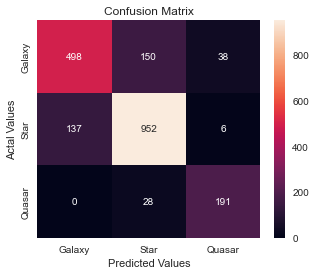

In [36]:
logisticRegression = LogisticRegression()
classPredictionLr=model(logisticRegression, 'Logistic Regression', X_train, y_train)
lrConfusionMatrix = confusion_matrix(y_test,classPredictionLr)
plotConfusionMatrixDF(lrConfusionMatrix)

## Naive Bayes

### GaussianNB 


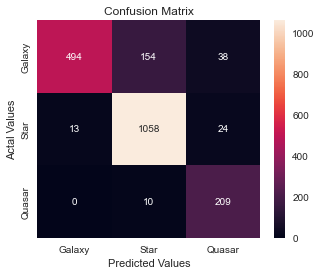

In [37]:
gaussianNB = GaussianNB()
gnbPrediction=model(gaussianNB, 'GaussianNB', X_train, y_train)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

### Bernoulli NB

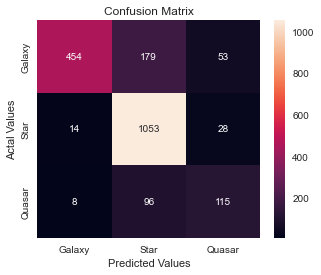

In [38]:
bernoulliNB = BernoulliNB()
bnbPrediction=model(bernoulliNB, 'BernoulliNB', X_train, y_train)
bnbConfusionMatrix = confusion_matrix(y_test,bnbPrediction)
plotConfusionMatrixDF(bnbConfusionMatrix)

## Linear SVC

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


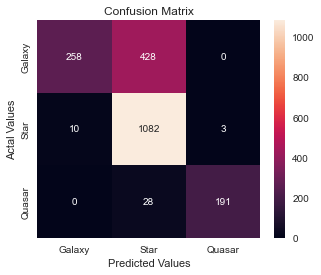

In [39]:
linearSVC = LinearSVC()
classPredictionSVC=model(linearSVC, 'Linear SVC', X_train, y_train)
svcConfusionMatrix = confusion_matrix(y_test,classPredictionSVC)
plotConfusionMatrixDF(svcConfusionMatrix)

## Decision Tree

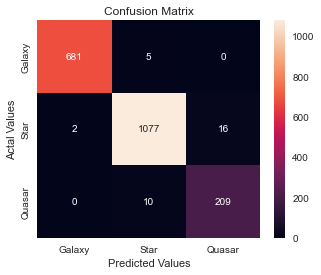

In [40]:
dtree = DecisionTreeClassifier()
classPredictionTree=model(dtree, 'Decision Tree', X_train, y_train)
dtreeConfusionMatrix = confusion_matrix(y_test,classPredictionTree)
plotConfusionMatrixDF(dtreeConfusionMatrix)

In [41]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

,importance
feature,
logRedshift,0.962064
color_g_r,0.008513
color_u_g,0.007590
color_i_z,0.006657
color_r_i,0.004626
modelFlux_u,0.002785
u,0.001527
g,0.001471
z,0.001375


## KNN

In [42]:
# #skyObjDataSample=skyObjData.sample(frac=0.2)
# #X_tr_sample, X_holdout_sample, y_tr_sample, y_holdout_sample = train_test_split(skyObjDataSample.iloc[:, 1:18], skyObjDataSample.loc[:, 'class'], test_size=0.2,random_state=76)
# #X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_tr_sample, y_tr_sample, test_size=.25, random_state=76)
# error_rate = []
# for i in range(1,30):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

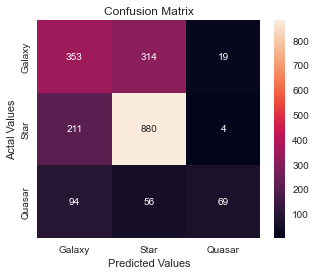

In [43]:
knn=KNeighborsClassifier(n_neighbors=5)
knnPrediction=model(knn, 'KNN', X_train, y_train)
knnConfusionMatrix = confusion_matrix(y_test,knnPrediction)
plotConfusionMatrixDF(knnConfusionMatrix)

## Bagging Algorithms

### Bagging Classifier

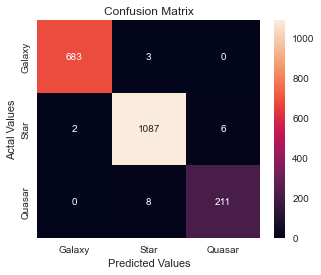

In [44]:
baggingClassifier = BaggingClassifier(base_estimator=dtree, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
bagginClassifierPrediction=model(baggingClassifier, 'Bagging Classifier', X_train, y_train)
bagConfusionMatrix = confusion_matrix(y_test,bagginClassifierPrediction)
plotConfusionMatrixDF(bagConfusionMatrix)

### Random Forest Classifier 

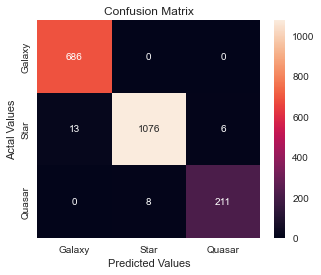

In [45]:
randomForestClassifier = RandomForestClassifier()
randomForestPrediction=model(randomForestClassifier, 'Random Forest Classifier', X_train, y_train)
randomForestConfusionMatrix = confusion_matrix(y_test,randomForestPrediction)
plotConfusionMatrixDF(randomForestConfusionMatrix)

In [46]:
# View feature importances
importances_rf = pd.DataFrame({'feature': X_train.columns,
                             'importance': randomForestClassifier.feature_importances_})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(17)

,importance
feature,
logRedshift,0.462320
color_r_i,0.139790
color_i_z,0.092758
color_u_g,0.087933
color_g_r,0.037900
i,0.033452
modelFlux_i,0.031592
modelFlux_z,0.022709
z,0.021604


## Boosting Algorithms 

### AdaBoost Classifier

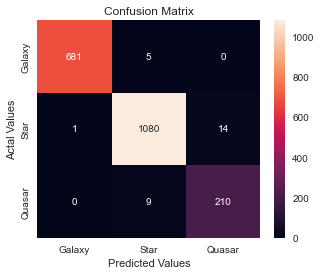

In [47]:
adaBoostclassifier = AdaBoostClassifier(base_estimator=dtree, n_estimators=100, random_state = 7)
adaBoostPrediction=model(adaBoostclassifier, 'Ada Boost Classifier', X_train, y_train)
adaBoostConfusionMatrix = confusion_matrix(y_test,adaBoostPrediction)
plotConfusionMatrixDF(adaBoostConfusionMatrix)

### Stochastic Gradient Boosting

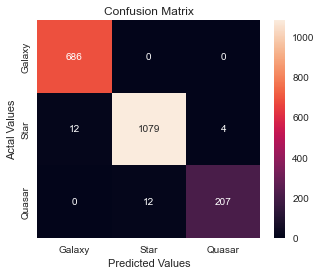

In [48]:
gradientBoostClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=7)
gradientBoostPrediction=model(gradientBoostClassifier, 'Stochastic Gradient Boosting', X_train, y_train)
gradientBoostConfusionMatrix = confusion_matrix(y_test,gradientBoostPrediction)
plotConfusionMatrixDF(gradientBoostConfusionMatrix)

# Classifier Comparison

In [49]:
comparisonDF = pd.DataFrame(comparisonData,columns=comparisonColumns)

In [50]:
comparisonDF.sort_values('Testing Accuracy',inplace=True)
comparisonDF.reset_index(inplace=True)
comparisonDF.drop(columns=['index'],inplace=True)

In [51]:
comparisonDF

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,KNN,65.10,0.663491,0.544433,0.573187
1,Linear SVC,76.55,0.883578,0.745456,0.762565
2,BernoulliNB,81.10,0.777813,0.716189,0.734933
3,Logistic Regression,82.05,0.813165,0.822500,0.817038
4,GaussianNB,88.05,0.870457,0.880222,0.864825
5,Decision Tree,98.35,0.970741,0.976870,0.973746
6,Ada Boost Classifier,98.55,0.974412,0.979306,0.976816
7,Gradient Boost Classifier,98.60,0.984284,0.976865,0.980437
8,Random Forest Classifier,98.65,0.982124,0.982040,0.982038
9,Bagging Classifier,99.05,0.986471,0.983930,0.985193


[Text(0, 0, 'KNN'),
 Text(1, 0, 'Linear SVC'),
 Text(2, 0, 'BernoulliNB'),
 Text(3, 0, 'Logistic Regression'),
 Text(4, 0, 'GaussianNB'),
 Text(5, 0, 'Decision Tree'),
 Text(6, 0, 'Ada Boost Classifier'),
 Text(7, 0, 'Gradient Boost Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Bagging Classifier')]

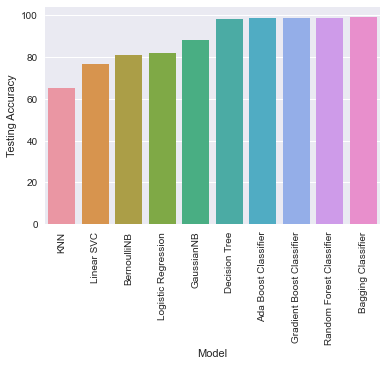

In [52]:
ax = sns.barplot(x="Model", y="Testing Accuracy", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'KNN'),
 Text(1, 0, 'Linear SVC'),
 Text(2, 0, 'BernoulliNB'),
 Text(3, 0, 'Logistic Regression'),
 Text(4, 0, 'GaussianNB'),
 Text(5, 0, 'Decision Tree'),
 Text(6, 0, 'Ada Boost Classifier'),
 Text(7, 0, 'Gradient Boost Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Bagging Classifier')]

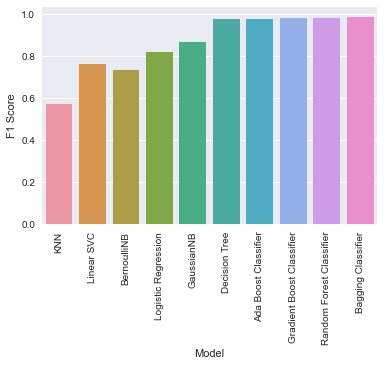

In [53]:
ax = sns.barplot(x="Model", y="F1 Score", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## ROC Curve

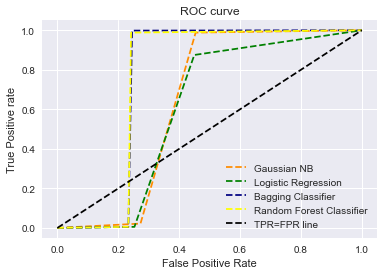

In [106]:
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, gnbPrediction, pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, classPredictionLr, pos_label=1)
fpr_bc, tpr_bc, thresh_bc = roc_curve(y_test, bagginClassifierPrediction, pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, randomForestPrediction, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr_gnb, tpr_gnb, linestyle='--',color='darkorange', label='Gaussian NB')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr_bc, tpr_bc, linestyle='--',color='navy', label='Bagging Classifier')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='yellow', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black', label='TPR=FPR line')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

## Hyperparameter Tuning

In [85]:
comparisonColumnsTuning = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonColumnsTuningData = []

## Tuning Gaussian NB

In [86]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.873817422860383e-08)


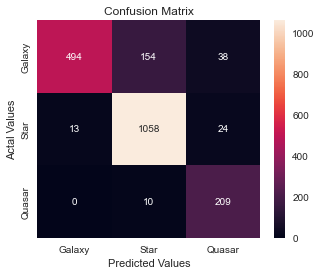

In [87]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
tunedGaussianNBPrediction = model(nbModel_grid, "Tuned GaussianNB", X_train, y_train, False)
print(nbModel_grid.best_estimator_)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

In [88]:
testAccuracy = round(accuracy_score(y_test,tunedGaussianNBPrediction)*100,2)
precision, recall, f1score, support = score(y_test, tunedGaussianNBPrediction, average='macro')

In [89]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='GaussianNB'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned GaussianNB",testAccuracy,precision,recall,f1score])

## Tuning Logistic Regression

In [91]:
lr = LogisticRegression(solver='newton-cg', penalty = 'l2', C=0.001)

In [92]:
tunedLr = model(lr,"Tuned LR",X_train, y_train, False)

In [93]:
testAccuracy = round(accuracy_score(y_test,tunedLr)*100,2)
precision, recall, f1score, support = score(y_test, tunedLr, average='macro')

In [94]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Logistic Regression'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned LR",testAccuracy,precision,recall,f1score])

## Tuning Bagging Classifier

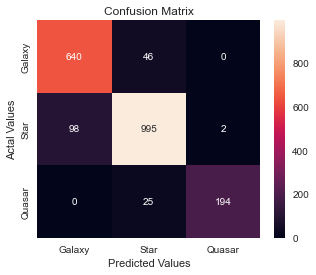

In [95]:
tunedBaggingClassifier= BaggingClassifier(base_estimator=linearSVC, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
tunedClassPredictionBag = model(tunedBaggingClassifier,"Tuned Bagging Classifier",X_train, y_train, False)
bagClassConfusionMatrix = confusion_matrix(y_test,tunedClassPredictionBag)
plotConfusionMatrixDF(bagClassConfusionMatrix)

In [96]:
testAccuracy = round(accuracy_score(y_test,tunedClassPredictionBag)*100,2)
precision, recall, f1score, support = score(y_test, tunedClassPredictionBag, average='macro')

In [97]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Bagging Classifier'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned Bagging Classifier",testAccuracy,precision,recall,f1score])

## Tuning Random Forest Classifier

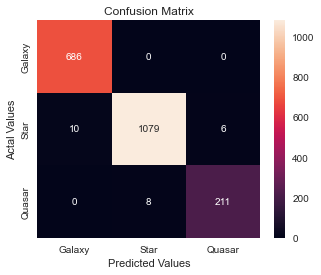

In [102]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=randomForestClassifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
tunedClassPredictionRF=model(grid_search,"Tuned Random Forest Classifier",X_train, y_train, False)
rfClassConfusionMatrix = confusion_matrix(y_test,tunedClassPredictionRF)
plotConfusionMatrixDF(rfClassConfusionMatrix)

In [103]:
testAccuracy = round(accuracy_score(y_test,tunedClassPredictionRF)*100,2)
precision, recall, f1score, support = score(y_test, tunedClassPredictionRF, average='macro')

In [104]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Random Forest Classifier'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned Random Forest Classifier",testAccuracy,precision,recall,f1score])

In [105]:
tuningDf = pd.DataFrame(comparisonColumnsTuningData,columns=comparisonColumnsTuning)
tuningDf

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,GaussianNB,88.05,0.870457,0.880222,0.864825
1,Tuned GaussianNB,90.40,0.875519,0.907778,0.887200
2,Logistic Regression,82.05,0.813165,0.822500,0.817038
3,Tuned LR,76.65,0.794520,0.720507,0.743358
4,Bagging Classifier,99.05,0.986471,0.983930,0.985193
5,Tuned Bagging Classifier,91.45,0.930133,0.909155,0.918229
6,Random Forest Classifier,98.65,0.982124,0.982040,0.982038
7,Tuned Random Forest Classifier,98.80,0.983541,0.982953,0.983218


## Holdout Data Test

In [75]:
print('Best model to test with Holdout data set')
print('Bagging Classifier with Decision Tree')

Best model to test with Holdout data set
Bagging Classifier with Decision Tree


In [83]:
baggingClassifier.fit(X_train,y_train)
holdoutClassPrediction = baggingClassifier.predict(X_holdout)    
testAccuracy = round(accuracy_score(y_holdout,holdoutClassPrediction)*100,2)
precision, recall, f1score, support = score(y_holdout, holdoutClassPrediction, average='macro')
holdoutYScore = baggingClassifier.predict_proba(X_holdout)
# Use X_holdout, y_holdout to calculate accuracy
holdoutAacc = round(accuracy_score(y_holdout, holdoutClassPrediction) * 100, 2)
print(f'Accuracy of Bagging Classifier Decision Tree on holdout: % {holdoutAacc}')

Accuracy of Bagging Classifier Decision Tree on holdout: % 98.95
